# Author: ABSAR AHMED
# Task#5
# Object

- Create the Decision Tree classifier and visualize it graphically.
- The purpose is if we feed any new data to this classifier, it would be able topredict the right class accordingly.


In [1]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import metrics 

In [2]:
df = pd.read_csv(r"F:\The Spark Foundation Dataset Csv\Iris.csv")

In [3]:
df.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
from sklearn import preprocessing

In [8]:
df['Species'] =  preprocessing.LabelEncoder().fit_transform(df['Species'])

In [9]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int32
dtype: object

# Split Data

In [10]:
X= df.iloc[:, 1:5].values
y = df.iloc[:, -1].values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,random_state=0)

In [35]:
len(X_train)

120

In [36]:
len(X_test)

30

# Import DecisionTree

In [12]:
from sklearn.preprocessing import StandardScaler
sc  = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
clf = DecisionTreeClassifier(criterion='entropy',random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

# Data Visualization

In [17]:
from sklearn import tree

classifier_tree = tree.DecisionTreeClassifier()
classifier_tree= classifier_tree.fit(X_train,y_train)

In [18]:
text_tree = tree.export_text(classifier_tree)
print(text_tree)

|--- feature_3 <= -0.56
|   |--- class: 0
|--- feature_3 >  -0.56
|   |--- feature_3 <= 0.67
|   |   |--- feature_2 <= 0.64
|   |   |   |--- feature_3 <= 0.54
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  0.54
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  0.64
|   |   |   |--- feature_3 <= 0.41
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  0.41
|   |   |   |   |--- feature_0 <= 1.26
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  1.26
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  0.67
|   |   |--- feature_2 <= 0.58
|   |   |   |--- feature_1 <= 0.11
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  0.11
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  0.58
|   |   |   |--- class: 2



[Text(502.20000000000005, 797.28, 'X[3] <= -0.557\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(424.9384615384615, 652.3199999999999, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(579.4615384615385, 652.3199999999999, 'X[3] <= 0.671\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(309.04615384615386, 507.35999999999996, 'X[2] <= 0.638\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(154.52307692307693, 362.4, 'X[3] <= 0.542\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(77.26153846153846, 217.43999999999994, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(231.7846153846154, 217.43999999999994, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(463.5692307692308, 362.4, 'X[3] <= 0.413\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(386.3076923076923, 217.43999999999994, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(540.8307692307692, 217.43999999999994, 'X[0] <= 1.262\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),


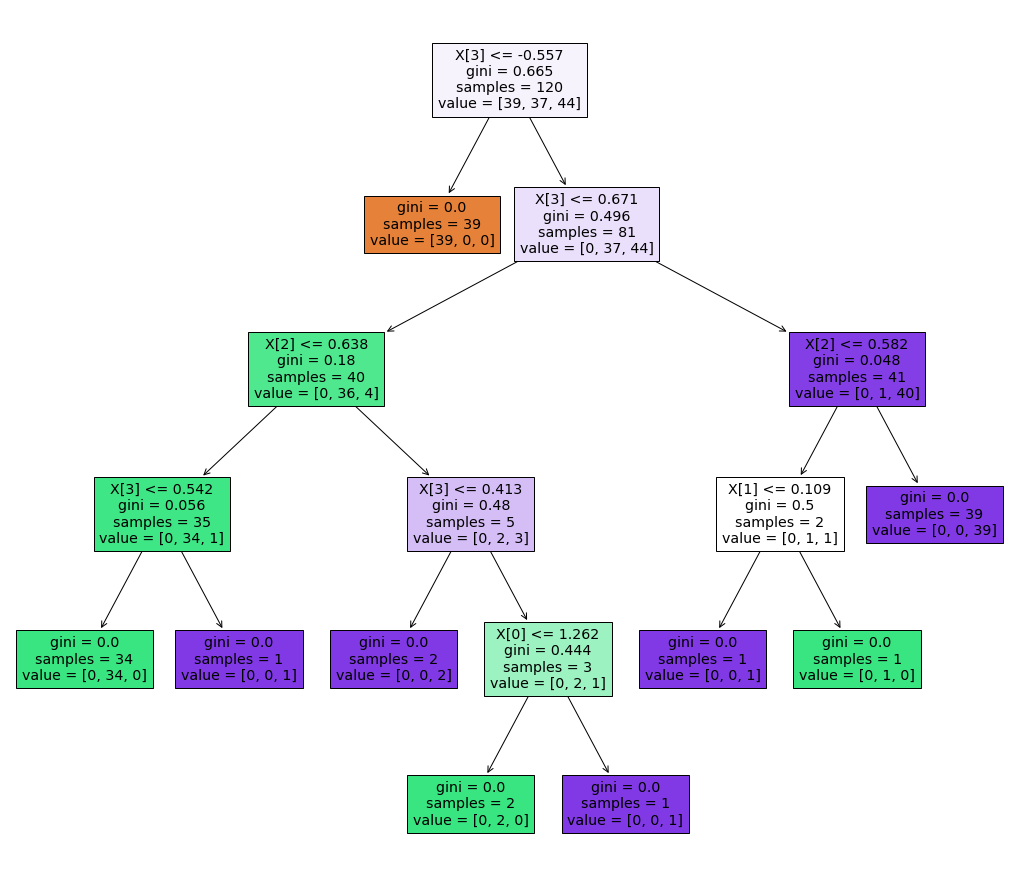

In [20]:
# DecisionTree Plot
plt.figure(figsize=(18,16))
tree.plot_tree(classifier_tree, filled= True, impurity=True)

In [40]:
dt= DecisionTreeClassifier(max_depth=2, random_state=1)

In [43]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [44]:
pre = dt.predict(X_test)

In [45]:
pre

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [68]:
classifier_tree.score(X_test,pre)

0.8

In [66]:
print(clf.score(X_test, pre))

0.8333333333333334


In [69]:
from sklearn import  metrics
print(metrics.classification_report(y_test,dt.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



# Result

This classifier can predict the species of the flower is 83% brilliant score.